# Construct Warehouse and Room Environment

In [17]:
import sys
sys.path.append('../')
from panav.environment.env import DefaultEmtpyEnv
from panav.hybrid import HybridGraph
from panav.environment.utils import box_2d_center

from panav.viz import draw_env,draw_hybrid

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Warehouse environment

/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/shapely/measurement.py:74: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)


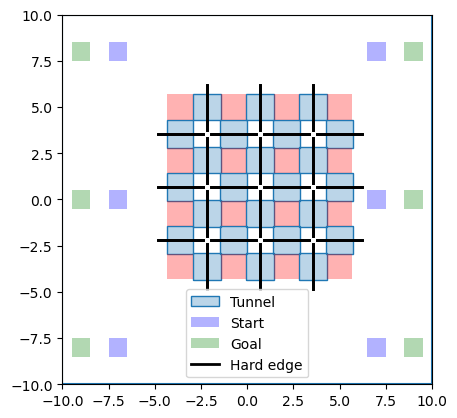

In [21]:
import numpy as np

bloating_r = 0.5
vmax = 1.0

env = DefaultEmtpyEnv()
# env.starts = []
# env.goals = []

shelf_region_x_limit = [-5.0,5.0]
shelf_region_y_limit = [-5.0,5.0]

obs_x_margin = 3 * 0.5
obs_y_margin = 3 * 0.5

n_col = 4
n_row = 4

w = (shelf_region_x_limit[1] - shelf_region_x_limit[0] - (n_col-1)*obs_x_margin )/n_col
h = (shelf_region_y_limit[1] - shelf_region_y_limit[0] - (n_row-1)*obs_y_margin )/n_row

upper_left_anchor = np.array([shelf_region_x_limit[0],shelf_region_y_limit[0]])
for i in range(n_row):
    for j in range(n_col):
        o = box_2d_center(upper_left_anchor+np.array([w + i * (w+obs_x_margin), h + j * (h+obs_y_margin)]),np.array([w,h]))
        env.obstacles.append(o)

# draw_env(env)

HG = HybridGraph(env,agent_radius= bloating_r,d=2,vmax= vmax)

draw_hybrid(HG,display_node=False)